In [10]:
import torch
from ptbxlae.dataprocessing.ptbxlDS import PtbxlSmallSig
import matplotlib.pyplot as plt
from ptbxlae.modeling.feedForwardVAE import SingleChannelFFNNVAE

In [11]:
torch.no_grad()
m = SingleChannelFFNNVAE.load_from_checkpoint('../cache/savedmodels/mccssfc-epoch=014-val_loss=0.019249.ckpt')
m = m.eval()
m

SingleChannelFFNNVAE(
  (encoder): Sequential(
    (0): Linear(in_features=500, out_features=250, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=250, out_features=125, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
  )
  (decoder): Sequential(
    (0): Linear(in_features=100, out_features=125, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=125, out_features=250, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=250, out_features=500, bias=True)
  )
  (mean): Linear(in_features=125, out_features=100, bias=True)
  (logvar): Linear(in_features=125, out_features=100, bias=True)
)

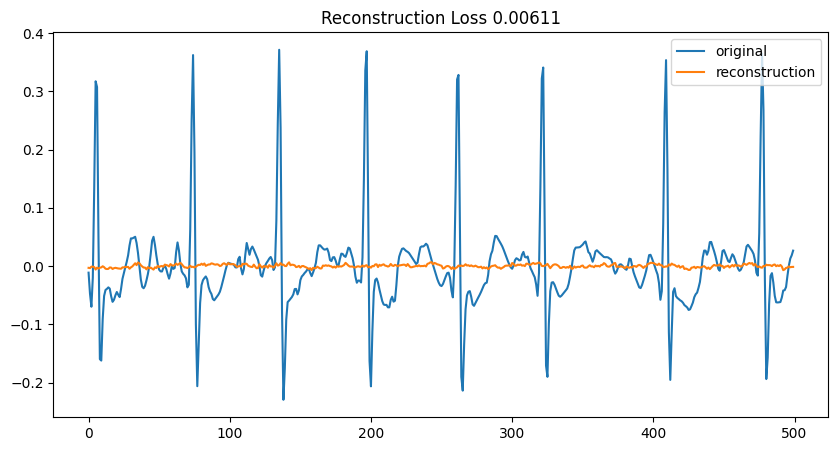

In [12]:
from torch.nn.functional import mse_loss

SAMPLE_IDX = 123

ds = PtbxlSmallSig(root_folder="../data", seq_len=500, single_channel=True)
sample = ds[SAMPLE_IDX]

latent_representation = m.encode(ds[SAMPLE_IDX].unsqueeze(0).to('cuda'))
# reconstruction = m.generate(latent_representation, smoothing_iterations=10).squeeze().detach().cpu()
reconstruction = m.decode(latent_representation).squeeze().detach().cpu()
orig_plot = ds[SAMPLE_IDX]

plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
ax.set_title(f"Reconstruction Loss {mse_loss(orig_plot, reconstruction):.5f}")
ax.plot(range(0, sample.shape[-1]), orig_plot, label='original')
ax.plot(range(0, sample.shape[-1]), reconstruction, label='reconstruction')
plt.legend(loc='best')
